In [1]:
# Created 09 Jun 23
# To do KDE plots of emissions intensity (EI) of S0-S4 to show distribution of
# datapoints in each scenario. Includes all 166 sites. AND
# Including LCA_used and LCA_generation (considering LCA based on capacity and with inverter replacement as S0)
# check Jupyter notebook version for plots: 'emi_kde_S0-S4-LCA'
# Some plots are saved in words: 'Chapter 5 thesis graveyard' & 'Ch5_prelresults_9Jun23'

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Move to path where csv is saved
path = "/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs"

cwd = os.getcwd()
cwd

os.chdir(path)

In [2]:
pwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs'

In [3]:
# Imports/reads csv of Emissions intensity of S0-S4 (created with another code)
emi_S0_S4 = pd.read_csv("emi_s0_s4.csv")
emi_S0_S4.describe().round(2)

,S0_EI,S1_EI,S2_EI,S3_EI,S4_EI
count,166.00,166.00,166.00,166.00,166.00
mean,487.80,377.51,306.95,259.76,243.54
std,285.80,163.96,144.89,105.51,97.54
min,130.72,194.90,165.94,133.97,132.02
25%,302.14,281.23,223.91,195.73,182.35
50%,404.83,329.72,271.62,235.90,218.03
75%,601.45,418.43,343.59,283.80,266.04
max,2195.91,1582.41,1512.61,815.83,759.69


In [4]:
# Change path to import csv with LCA results (preliminary results for now)
path2="/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/LCA/Plots LCA PJua"  
os.chdir(path2)

In [5]:
pwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/LCA/Plots LCA PJua'

In [6]:
# Import results from LCA which are the copied values from tab 'S0_utilisation_rate' in
# excel 'Ch5 LCA Project Jua (6Jun23)', columns I (used) and N (generation)
                        # or 9Jun23 excel 
LCA_prelres = pd.read_csv("LCA_prelres.csv")

# check type of columns
LCA_prelres.dtypes

Site_name          object
County             object
Institution        object
LCA_used          float64
LCA_generation    float64
dtype: object

In [7]:
LCA_prelres.head().round(2)

,Site_name,County,Institution,LCA_used,LCA_generation
0,AIC_Nadoto_Primary_School,Turkana,School,0.50,0.09
1,AIC_Nayanaekaton_Primary_School,Turkana,School,0.64,0.09
2,A_IC_Gangani_Primary_School,Kwale,School,0.38,0.09
3,Abagarse_Primary_School,Isiolo,School,0.71,0.09
4,Akadeli_Primary_School,Isiolo,School,0.30,0.09


In [8]:
# Convert LCA values from kg to grams selecting only columns with dtype "float64"
LCA_prelres[LCA_prelres.select_dtypes(include=["float64"]).columns] *= 1000
                                            # or delete = so it extracts the columns only to then concat
LCA_prelres.head().round(2)

,Site_name,County,Institution,LCA_used,LCA_generation
0,AIC_Nadoto_Primary_School,Turkana,School,503.57,90.44
1,AIC_Nayanaekaton_Primary_School,Turkana,School,643.97,90.44
2,A_IC_Gangani_Primary_School,Kwale,School,375.88,92.60
3,Abagarse_Primary_School,Isiolo,School,708.77,88.81
4,Akadeli_Primary_School,Isiolo,School,298.27,88.81


In [9]:
# Import library and set format for plotting
import seaborn as sns

# set style for formatting plots
sns.set(rc={"figure.dpi":300})
sns.set_context("notebook")  # change to paper maybe? I prefer notebook style i think...
sns.set_style("ticks") # with axis ticks, no background lines
# sns.set_style("whitegrid")

Text(0.5, 1.0, 'LCA total energy used')

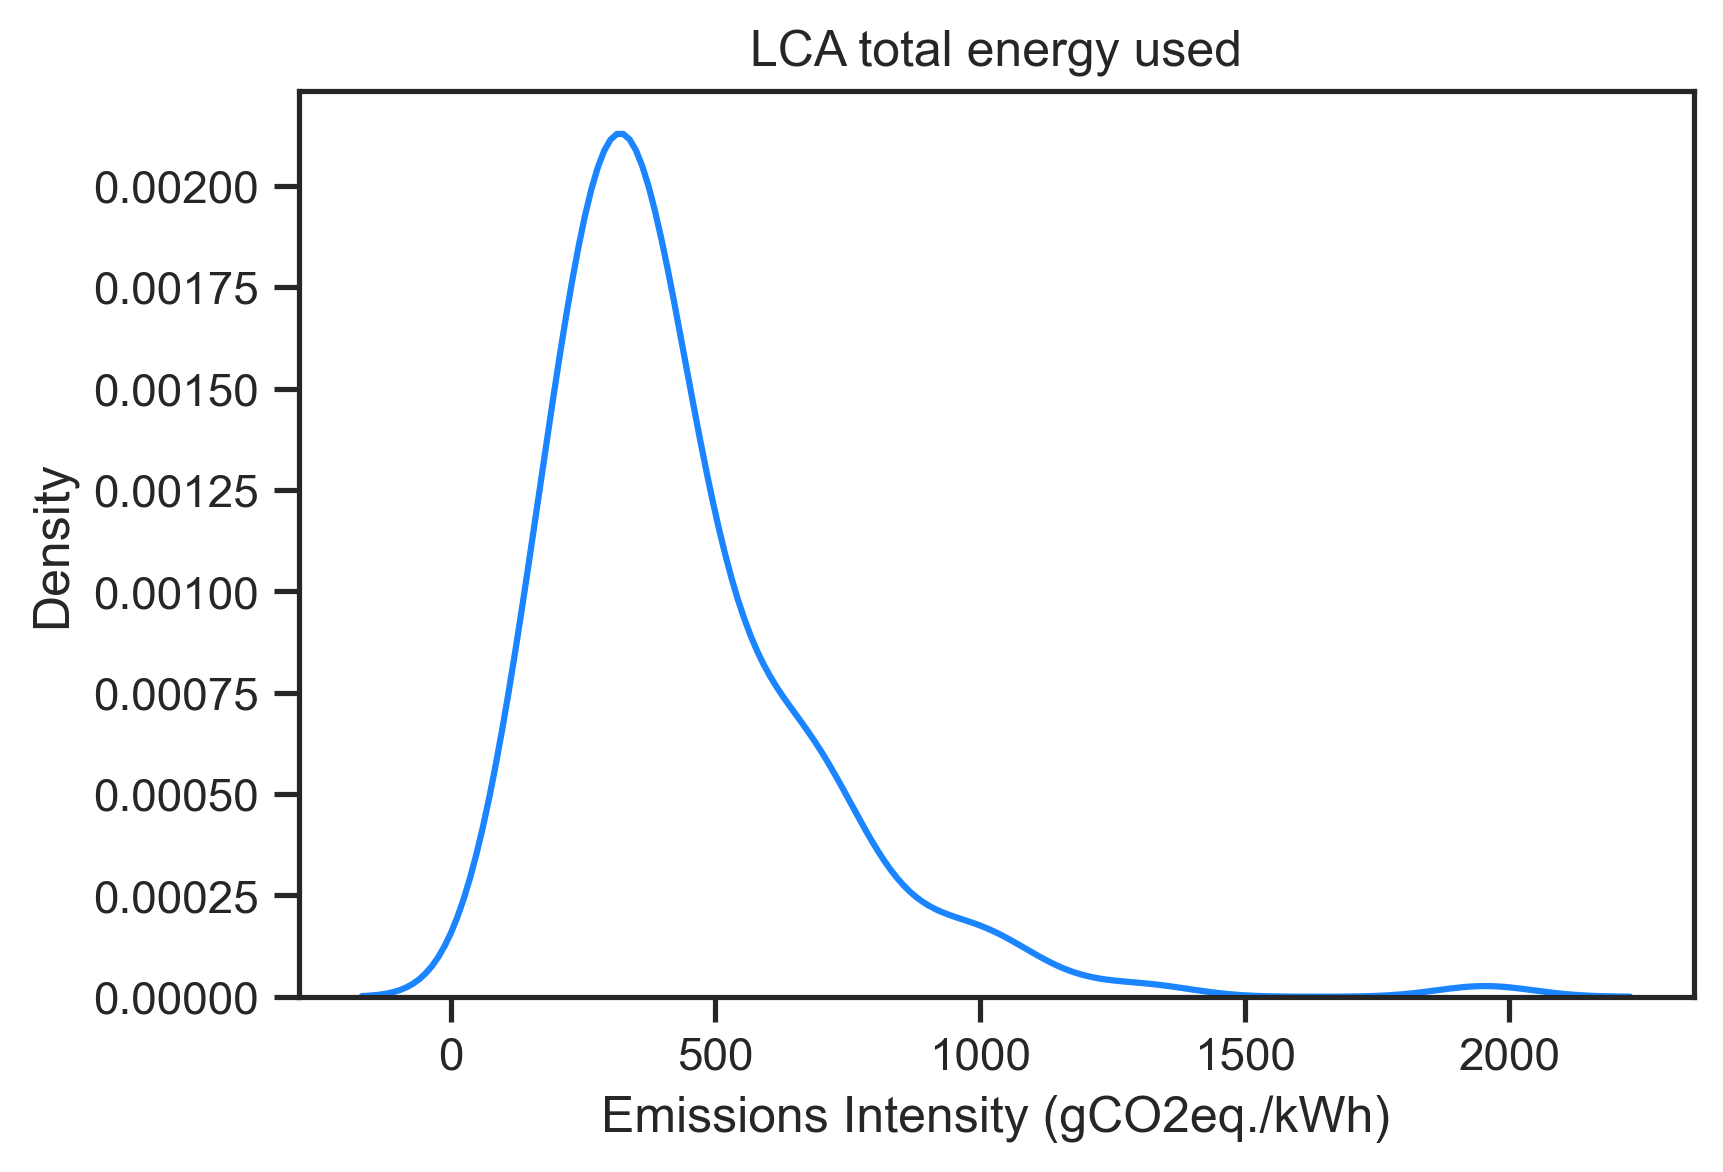

In [11]:
# Plot LCA_used
sns.kdeplot(data=LCA_prelres, x="LCA_used", color="#1A85FF")
plt.xlabel("Emissions Intensity (gCO2eq./kWh)") # or "Emissions Intensity (gCO2eq./kWh)"
plt.title("LCA total energy used")

Text(0.5, 1.0, 'LCA total energy generated')

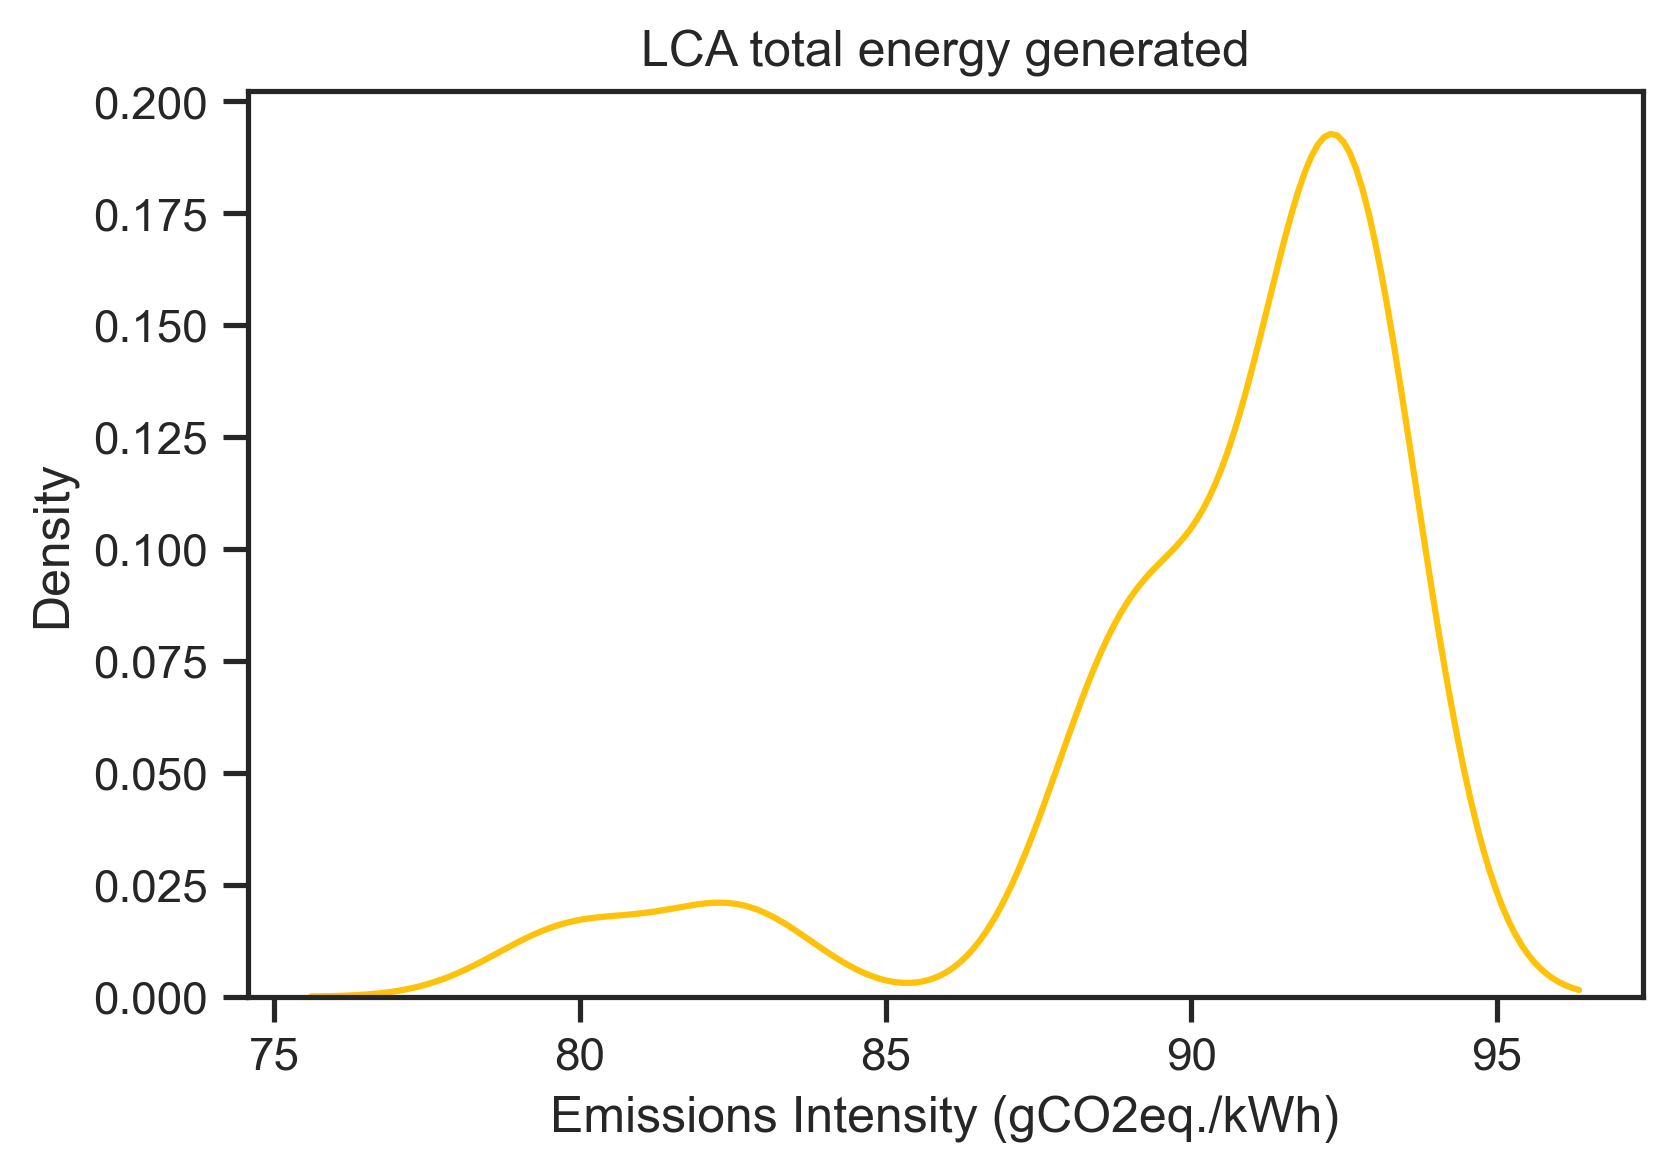

In [12]:
# Plot LCA_generated
sns.kdeplot(data=LCA_prelres.LCA_generation, color= "#FFC20A") # fill=True
plt.xlabel("Emissions Intensity (gCO2eq./kWh)") # or "Emissions Intensity (gCO2eq./kWh)"
plt.title("LCA total energy generated")

In [13]:
# extract LCA columns to add to emi_S0_S4 df (I could just multiplied without = in *= above too,
# that returns a df with only the two numeric columns so it is a shortcut
# LCA_grams = LCA_prelres[LCA_prelres.select_dtypes(include=["float64"]).columns] * 1000
extracted_cols = LCA_prelres[["LCA_used", "LCA_generation"]]
# LCA_grams.equals(extracted_cols)

# Join df including LCA_used and LCA_generation
emi_S0_S4_LCA = emi_S0_S4.join(extracted_cols) # or LCA_grams
emi_S0_S4_LCA.columns

Index(['Site_name', 'County', 'Institution', 'S0_EI', 'S1_EI', 'S2_EI',
       'S3_EI', 'S4_EI', 'LCA_used', 'LCA_generation'],
      dtype='object')

In [14]:
emi_S0_S4_LCA.head().round(2)

,Site_name,County,Institution,S0_EI,S1_EI,S2_EI,S3_EI,S4_EI,LCA_used,LCA_generation
0,AIC_Nadoto_Primary_School,Turkana,School,565.90,600.36,488.64,387.17,302.26,503.57,90.44
1,AIC_Nayanaekaton_Primary_School,Turkana,School,723.68,391.62,362.66,249.20,249.20,643.97,90.44
2,A_IC_Gangani_Primary_School,Kwale,School,422.40,228.79,228.79,222.38,222.38,375.88,92.60
3,Abagarse_Primary_School,Isiolo,School,796.50,304.47,273.64,273.64,273.64,708.77,88.81
4,Akadeli_Primary_School,Isiolo,School,335.19,248.58,221.61,170.60,170.60,298.27,88.81


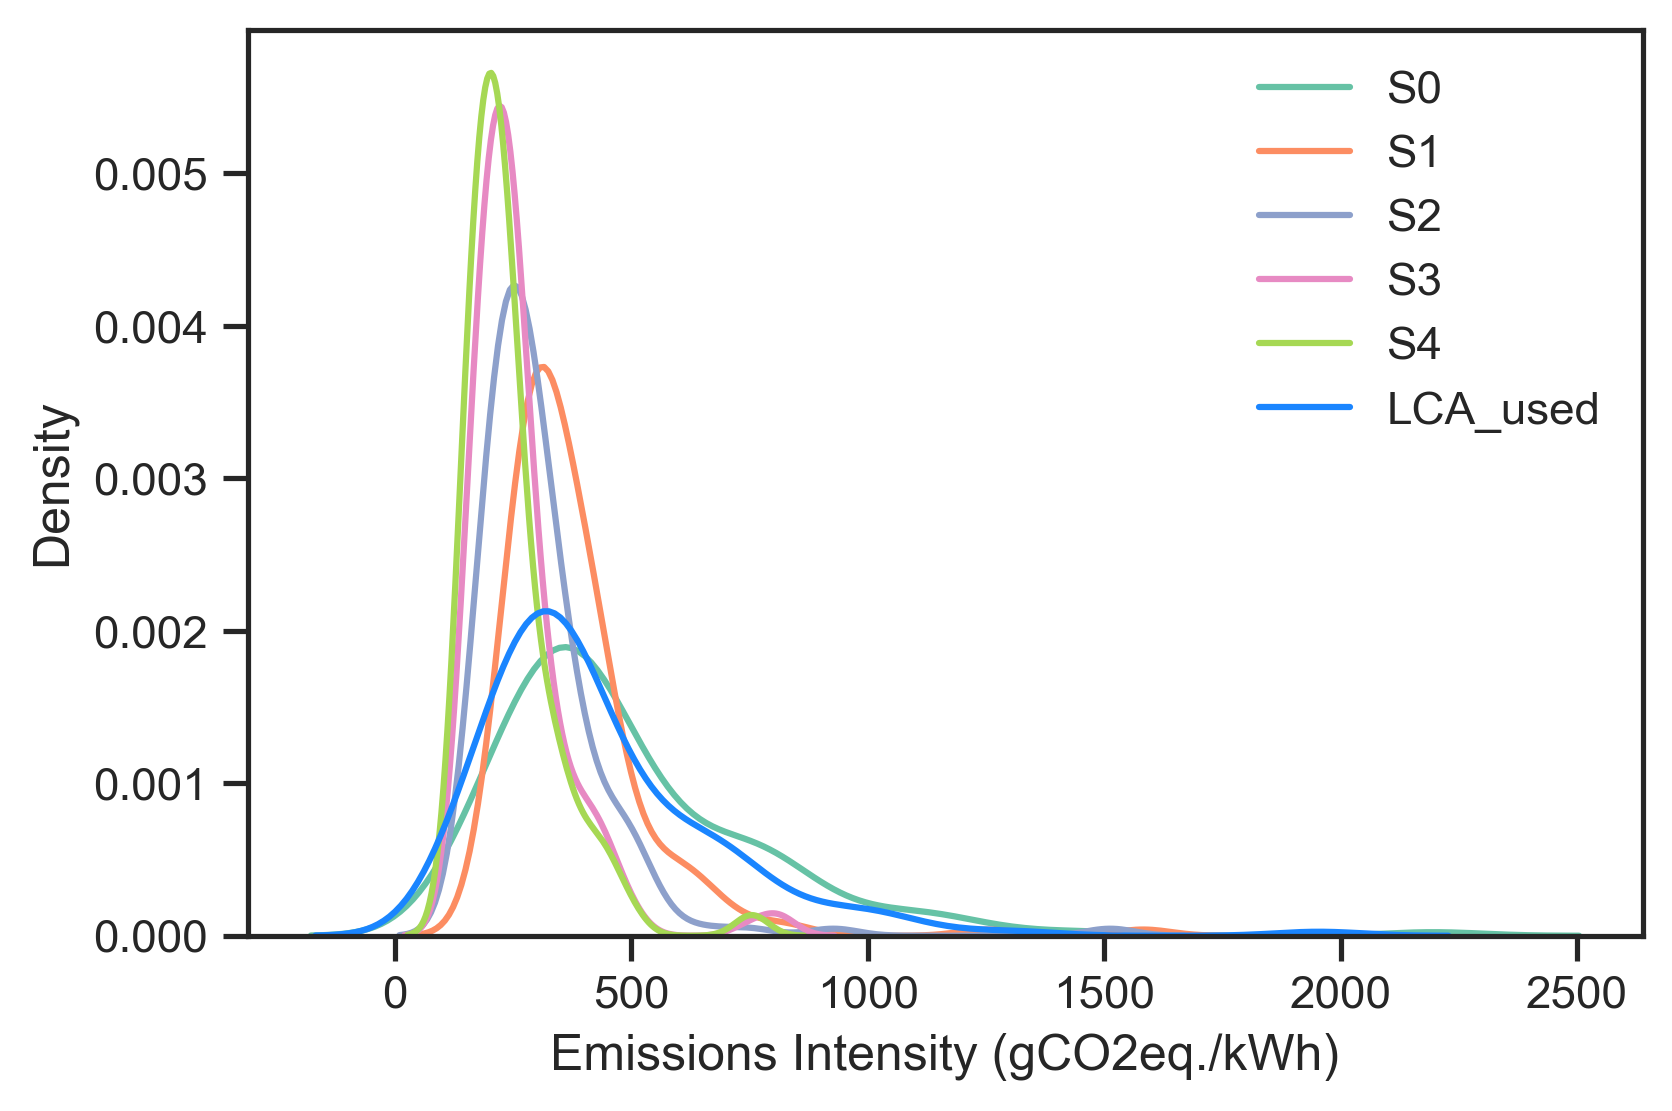

In [15]:
colors7 = ['#66c2a5', "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", '#ffd92f', '#e5c494']

# Final version of plot (for now) - FIG 2 LCA in 'Ch5_prelresults_9Jun23' wordoc
fig,ax = plt.subplots(1,1)
sns.kdeplot(data=emi_S0_S4_LCA.S0_EI, color=colors7[0], label="S0", ax=ax) # fill=True
sns.kdeplot(data=emi_S0_S4_LCA.S1_EI, color=colors7[1],label="S1", ax=ax) # fill=True
sns.kdeplot(data=emi_S0_S4_LCA.S2_EI, color=colors7[2],label="S2", ax=ax) # fill=True
sns.kdeplot(data=emi_S0_S4_LCA.S3_EI, color=colors7[3],label="S3", ax=ax) # fill=True
sns.kdeplot(data=emi_S0_S4_LCA.S4_EI, color=colors7[4],label="S4", ax=ax) # fill=True
sns.kdeplot(data=emi_S0_S4_LCA.LCA_used, color="#1A85FF",label="LCA_used", ax=ax) # or color=colors7[5]
plt.xlabel("Emissions Intensity (gCO2eq./kWh)")
plt.legend(frameon=False)

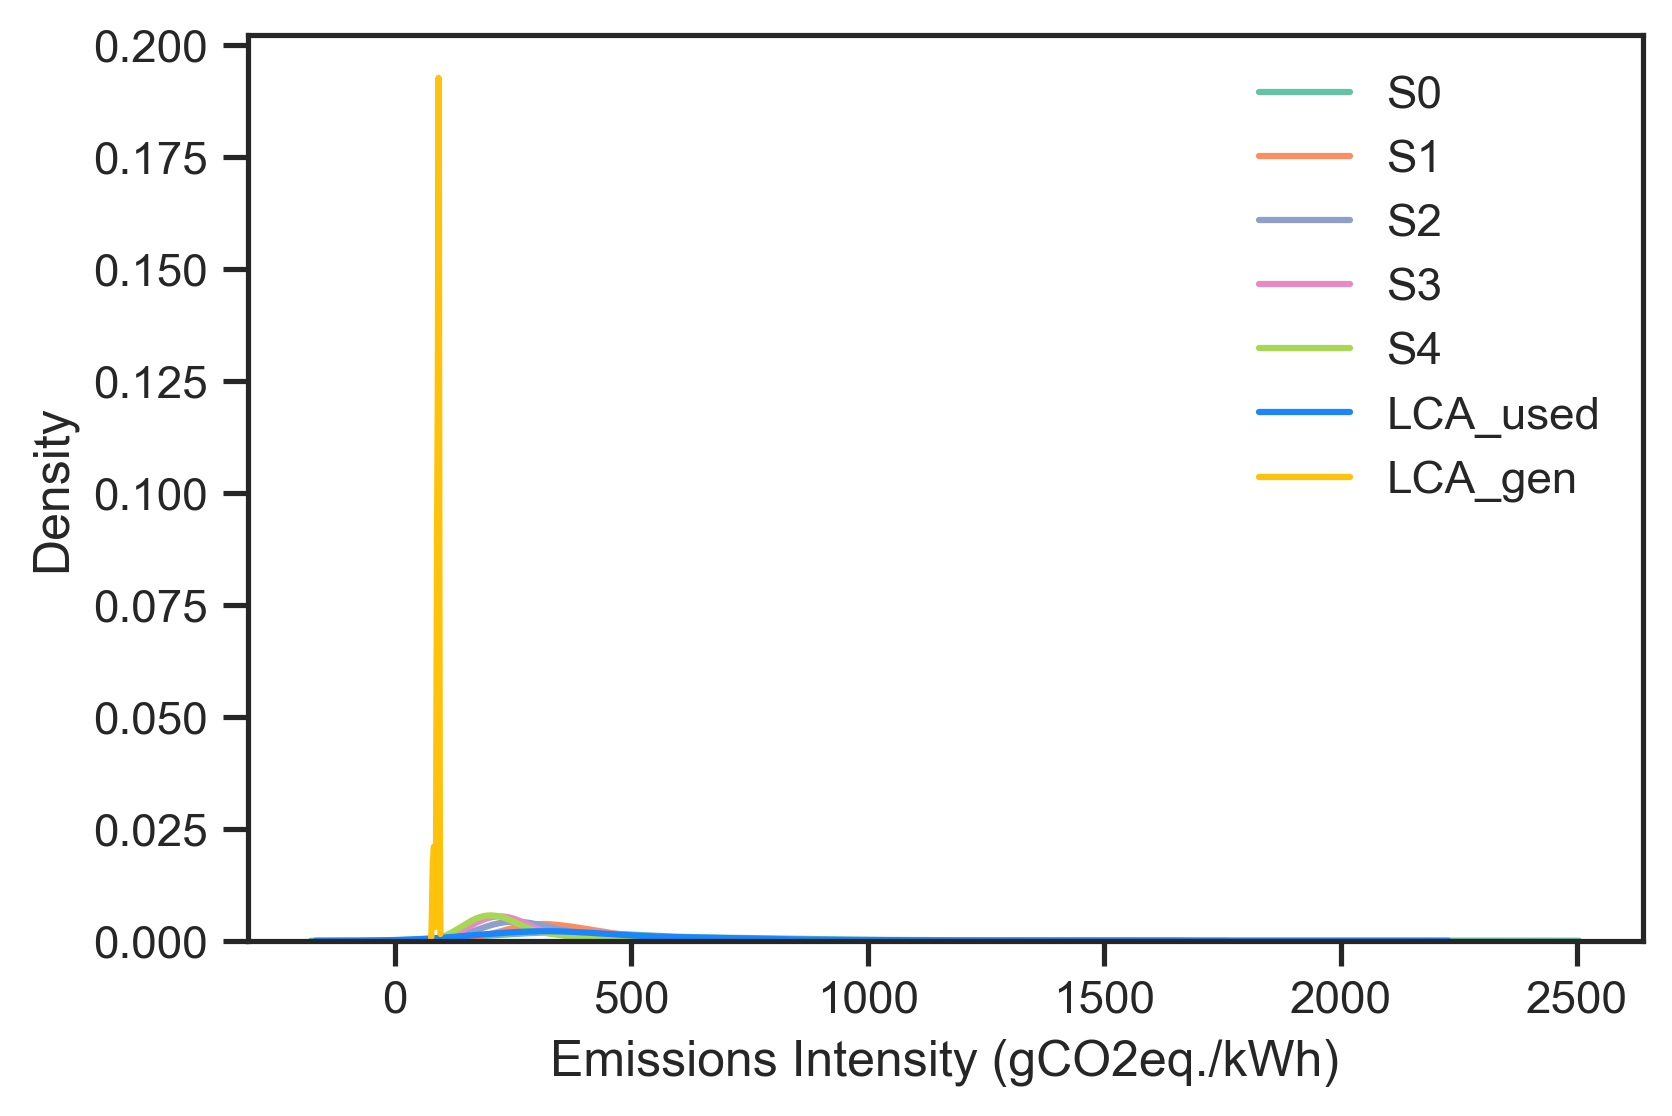

In [16]:
# Same as above but adding LCA_generation (again is weird)
fig,ax = plt.subplots(1,1)
sns.kdeplot(data=emi_S0_S4_LCA.S0_EI, color=colors7[0], label="S0", ax=ax) # fill=True
sns.kdeplot(data=emi_S0_S4_LCA.S1_EI, color=colors7[1],label="S1", ax=ax) # fill=True
sns.kdeplot(data=emi_S0_S4_LCA.S2_EI, color=colors7[2],label="S2", ax=ax) # fill=True
sns.kdeplot(data=emi_S0_S4_LCA.S3_EI, color=colors7[3],label="S3", ax=ax) # fill=True
sns.kdeplot(data=emi_S0_S4_LCA.S4_EI, color=colors7[4],label="S4", ax=ax) # fill=True
sns.kdeplot(data=emi_S0_S4_LCA.LCA_used, color="#1A85FF",label="LCA_used", ax=ax) # fill=True
sns.kdeplot(data=emi_S0_S4_LCA.LCA_generation, color="#FFC20A",label="LCA_gen", ax=ax) # fill=True
plt.xlabel("Emissions Intensity (gCO2eq./kWh)")
plt.legend(frameon=False)


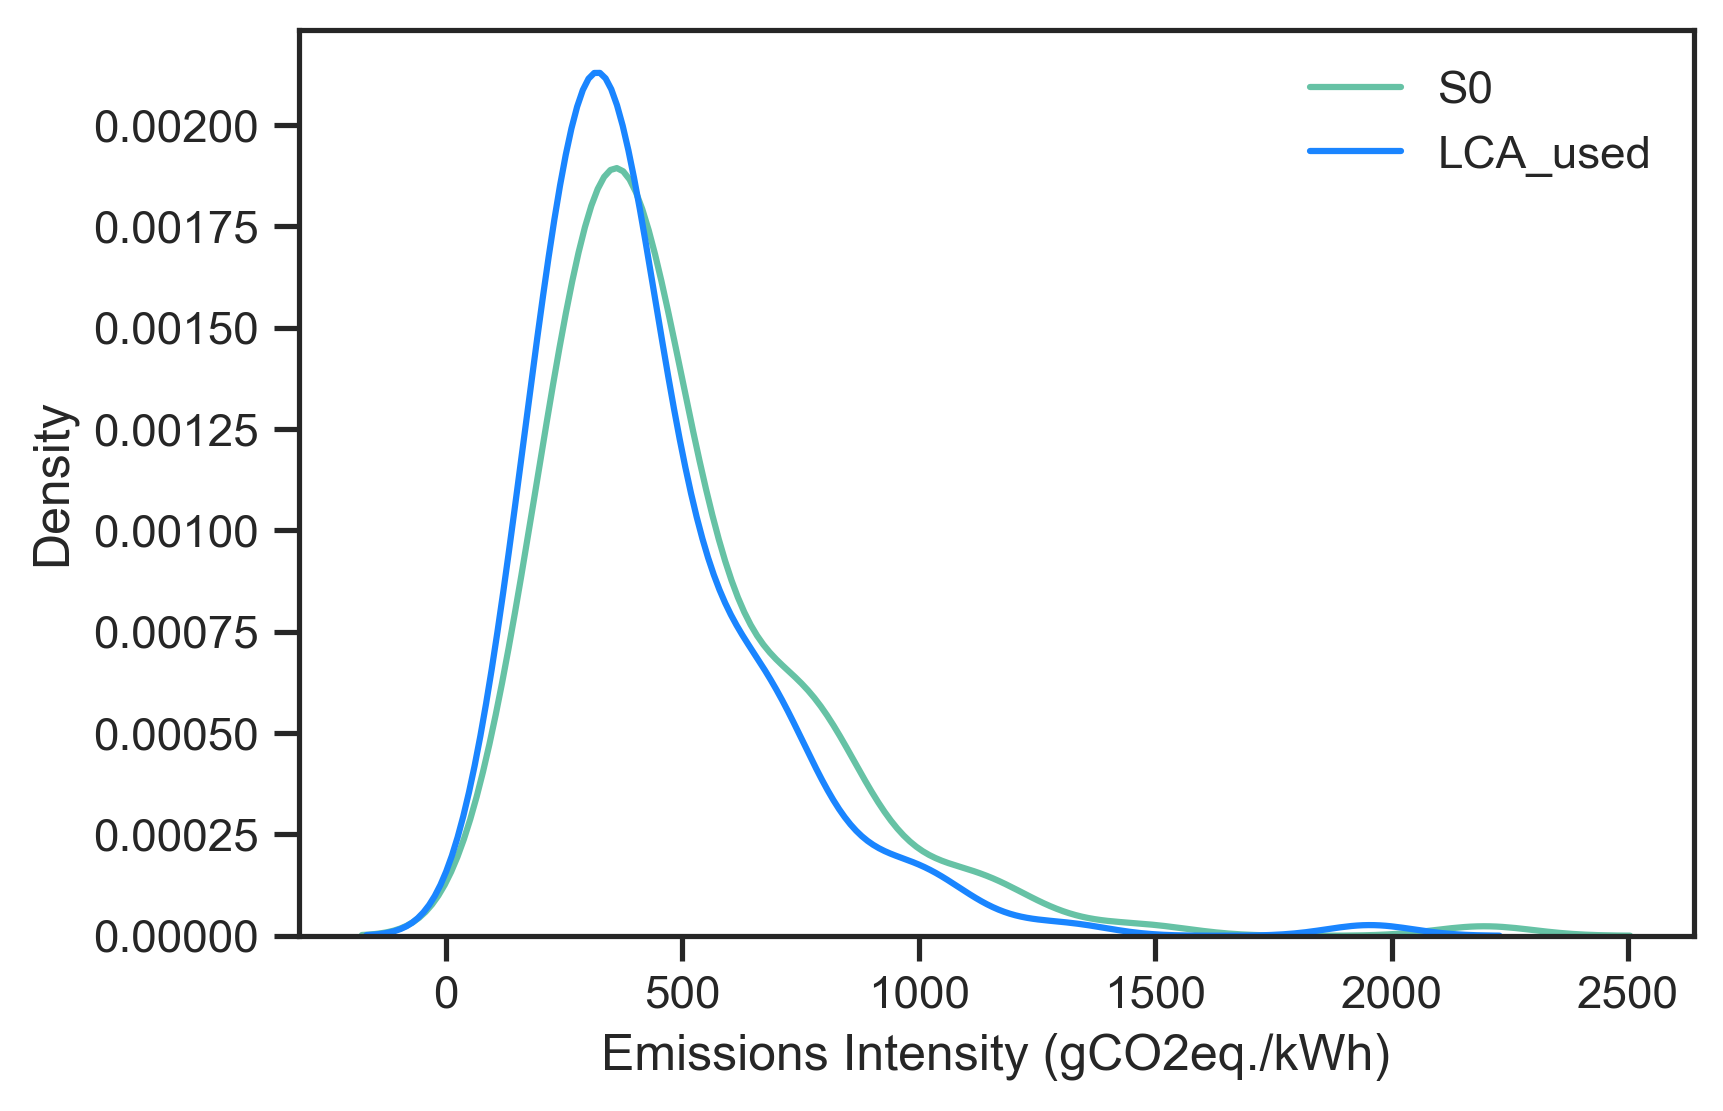

In [17]:
# Plotting only comparable scenarios
fig,ax = plt.subplots(1,1)
sns.kdeplot(data=emi_S0_S4_LCA.S0_EI, color=colors7[0], label="S0", ax=ax) # fill=True
sns.kdeplot(data=emi_S0_S4_LCA.LCA_used, color="#1A85FF",label="LCA_used", ax=ax) # fill=True
plt.xlabel("Emissions Intensity (gCO2eq./kWh)")
plt.legend(frameon=False)

# #D41159 #pink color
# #1A85FF #blue color

In [18]:
# To get table values 
emi_S0_S4_LCA.describe().round(2)

,S0_EI,S1_EI,S2_EI,S3_EI,S4_EI,LCA_used,LCA_generation
count,166.00,166.00,166.00,166.00,166.00,166.00,166.00
mean,487.80,377.51,306.95,259.76,243.54,429.99,90.27
std,285.80,163.96,144.89,105.51,97.54,253.93,3.46
min,130.72,194.90,165.94,133.97,132.02,106.00,79.34
25%,302.14,281.23,223.91,195.73,182.35,267.06,88.81
50%,404.83,329.72,271.62,235.90,218.03,358.24,92.24
75%,601.45,418.43,343.59,283.80,266.04,533.43,92.60
max,2195.91,1582.41,1512.61,815.83,759.69,1954.06,92.60


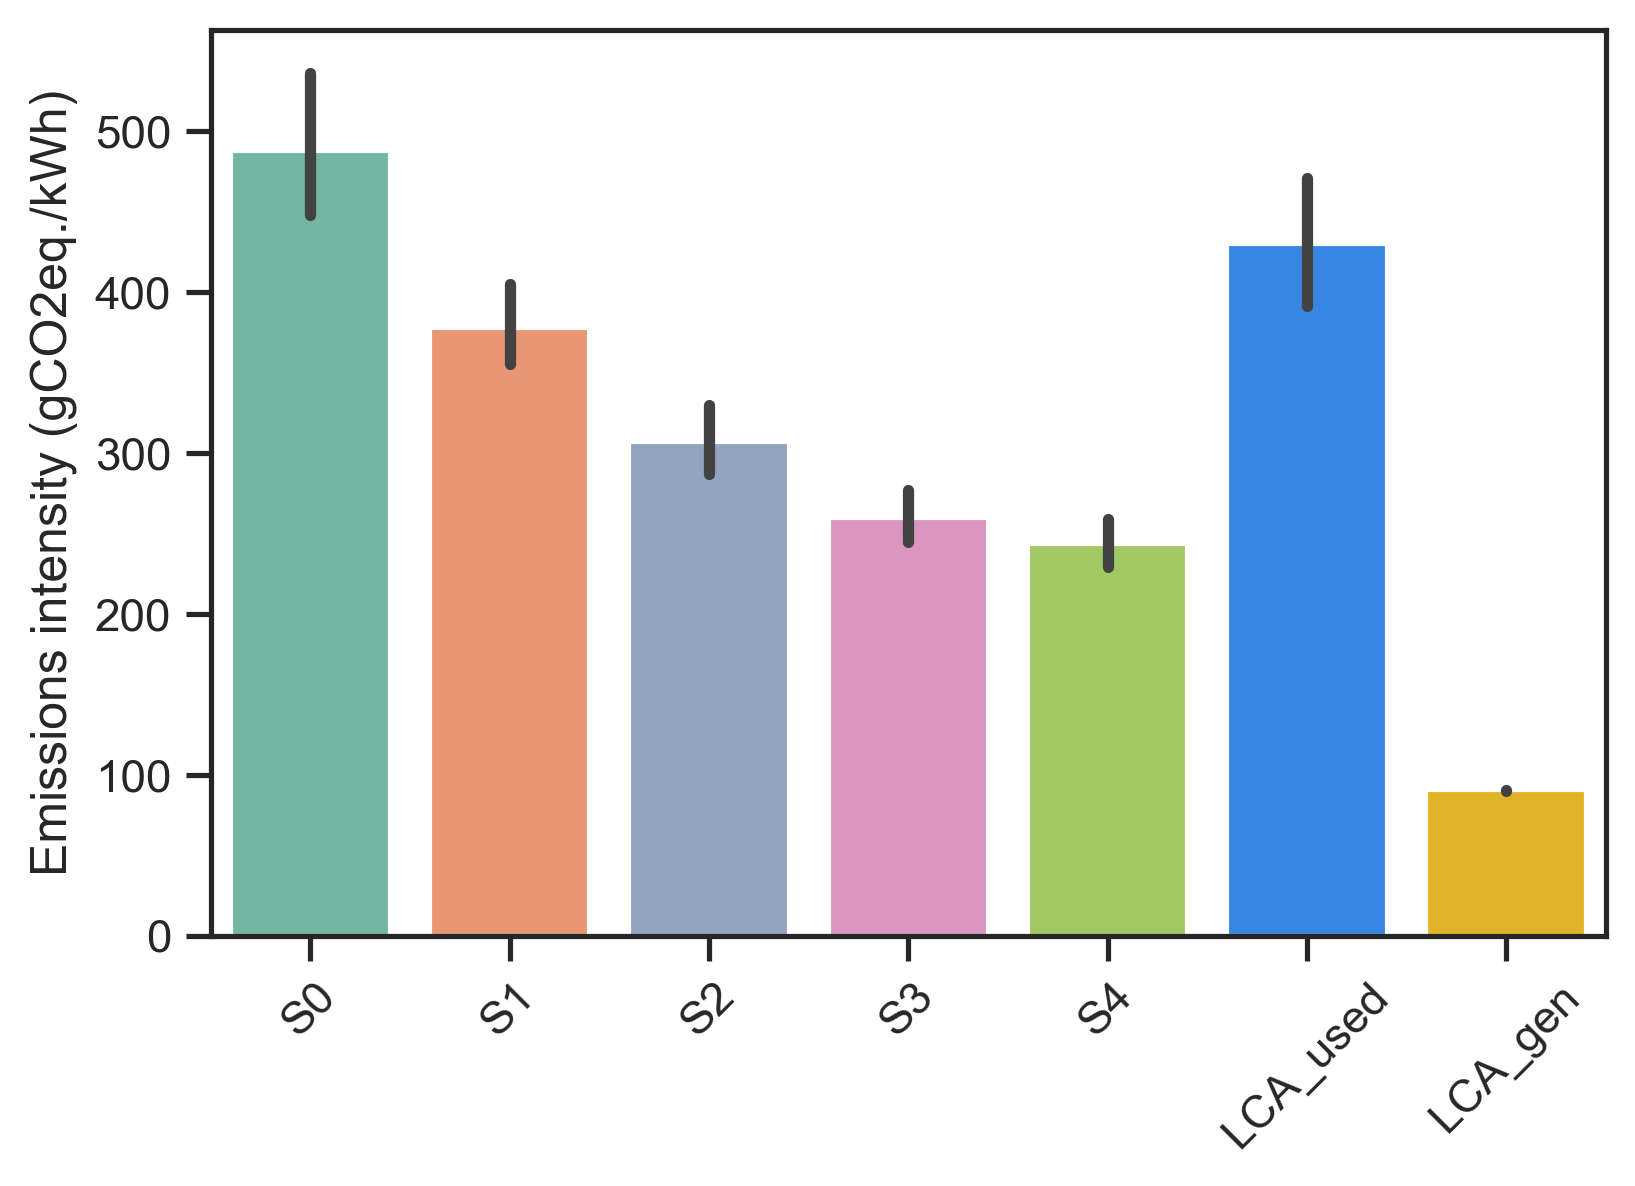

In [19]:
# Make barplot of emissions S0-S4 and LCA_used & LCA_gen
colorsbar2 = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", "#1A85FF", "#FFC20A"]
g=sns.barplot(data=emi_S0_S4_LCA, palette=colorsbar2)
g.set_xticklabels(["S0", "S1", "S2", "S3", "S4", "LCA_used", "LCA_gen"])
g.set(xlabel="", ylabel="Emissions intensity (gCO2eq./kWh)")
for item in g.get_xticklabels():
    item.set_rotation(45)

In [21]:
# Join df including LCA_used only - maybe I don't need this if I don't plot used only in barchart
emi_S0_S4_LCA_used2 = emi_S0_S4.join(extracted_cols["LCA_used"]) # or LCA_grams
emi_S0_S4_LCA_used2.head().round(2)

,Site_name,County,Institution,S0_EI,S1_EI,S2_EI,S3_EI,S4_EI,LCA_used
0,AIC_Nadoto_Primary_School,Turkana,School,565.90,600.36,488.64,387.17,302.26,503.57
1,AIC_Nayanaekaton_Primary_School,Turkana,School,723.68,391.62,362.66,249.20,249.20,643.97
2,A_IC_Gangani_Primary_School,Kwale,School,422.40,228.79,228.79,222.38,222.38,375.88
3,Abagarse_Primary_School,Isiolo,School,796.50,304.47,273.64,273.64,273.64,708.77
4,Akadeli_Primary_School,Isiolo,School,335.19,248.58,221.61,170.60,170.60,298.27


[Text(0.5, 0, ''), Text(0, 0.5, 'Emissions intensity (gCO2eq./kWh)')]

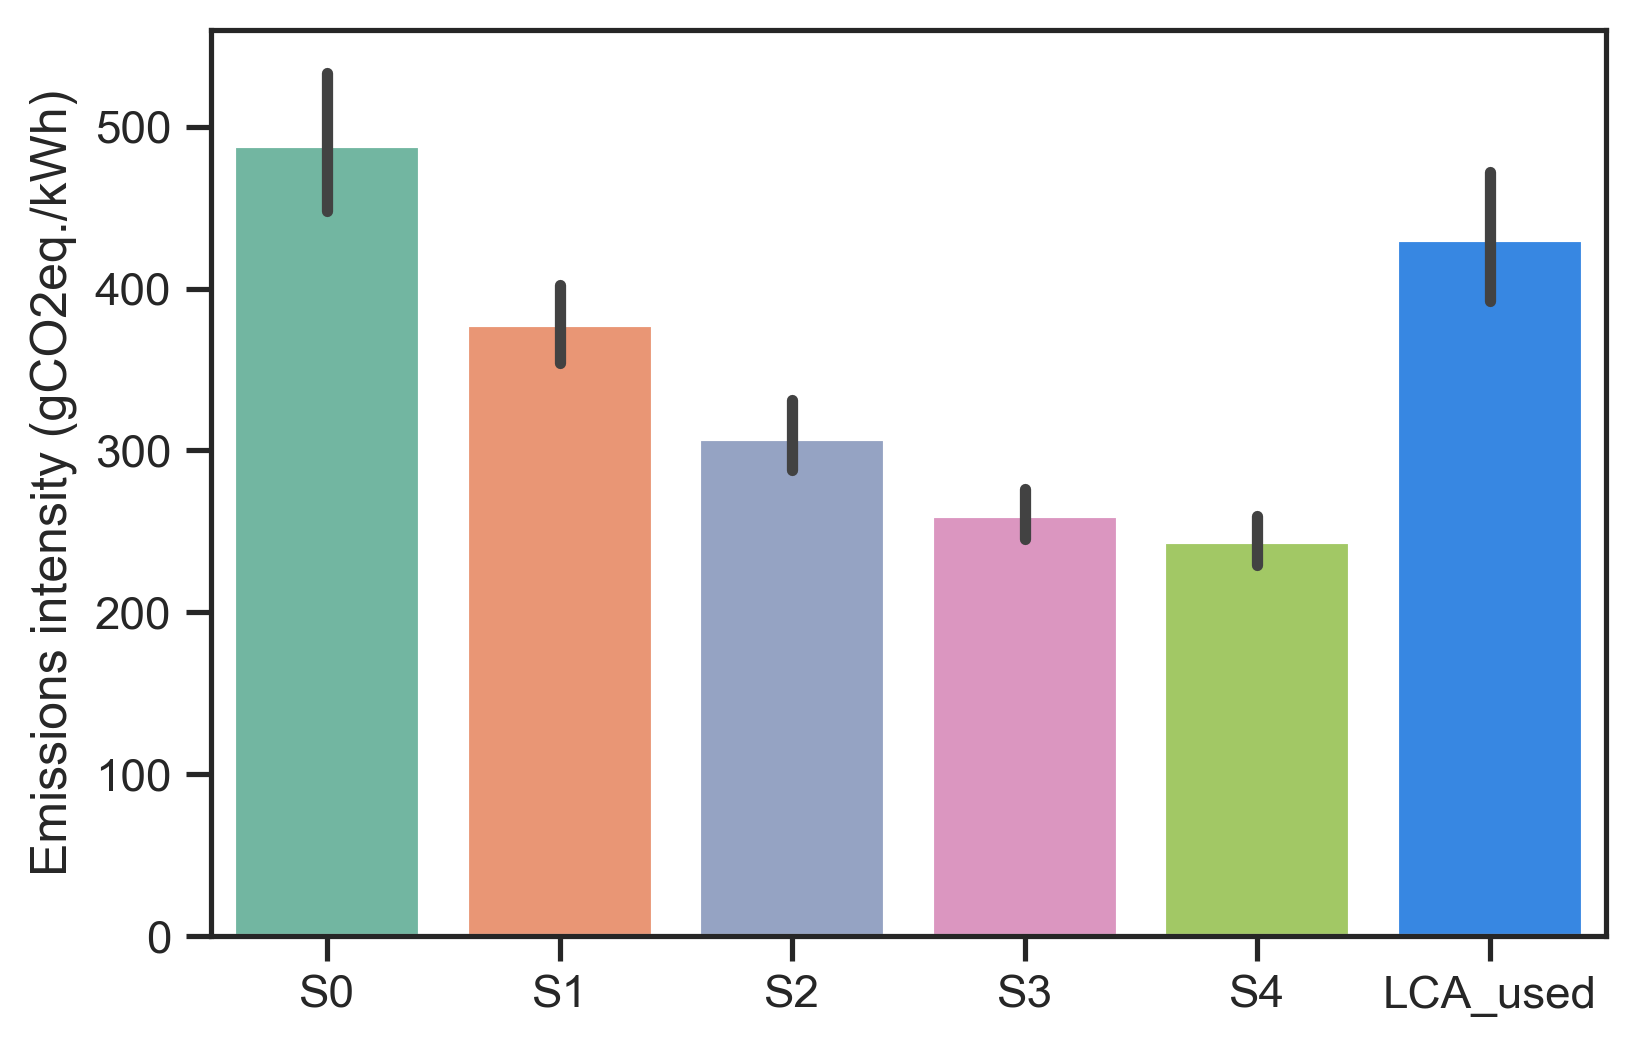

In [22]:
# Make barplot of emissions S0-S4 and LCA_used
colorsbar = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", "#1A85FF"]
g=sns.barplot(data=emi_S0_S4_LCA_used2, palette=colorsbar)
g.set_xticklabels(["S0", "S1", "S2", "S3", "S4", "LCA_used"])
g.set(xlabel="", ylabel="Emissions intensity (gCO2eq./kWh)")

In [ ]:
# Note: for LCA_used & LCA_generated I copied the values into the csv imported here ("LCA_prelres.csv") 
# from excel where I did LCA calculations "Ch5 LCA Project Jua (9Jun23)" or 6Jun23. 
# So if these change or something is wrong with them, make plots again with new values using this code.  